# OpenCV사용하기

### OpenCV에서 필요한 라이브러리 가져오기

In [5]:
import cv2
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [44]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [46]:
test1 = cv2.imread('data/test1.jpg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

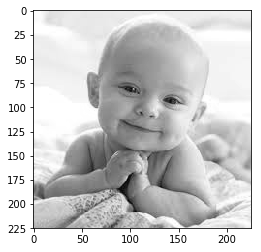

In [47]:
plt.imshow(gray_img, cmap='gray')

### 분류기 로드하기

# Haar 분류기

In [57]:
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

In [58]:
#let's detect multiscale (some images may be closer to camera than others) images 
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);  
 
#print the number of faces found 
print('Faces found: ', len(faces))
 
#Faces found:  1

Faces found:  1


In [59]:
for (x, y, w, h) in faces:     
         cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

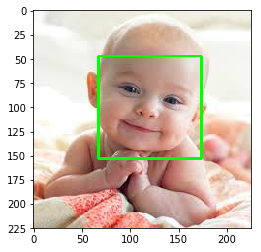

In [60]:
#convert image to RGB and show image 
plt.imshow(convertToRGB(test1))

## OPENCV코드를 함수로 그룹화하기(위 코드)

In [54]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    img_copy = colored_img.copy()
    
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    for(x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

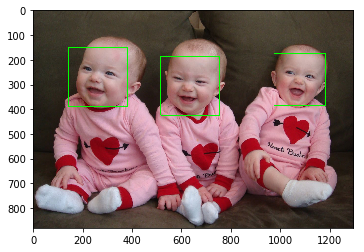

In [61]:
test2 = cv2.imread('data/test3.jpg')

faces_detected_img = detect_faces(haar_face_casecade, test2)

plt.imshow(convertToRGB(faces_detected_img))

## 거짓 POS 다루기

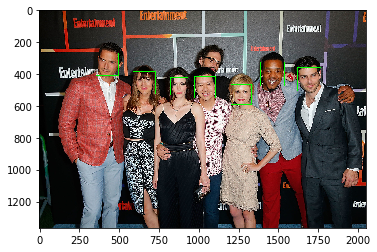

In [63]:
test2 = cv2.imread('data/test4.jpg')
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.2)

plt.imshow(convertToRGB(faces_detected_img))

# OPENCV CODE2-LBP CASCADE CLASSIFIER

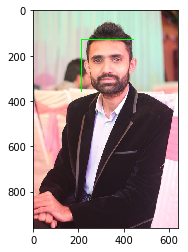

In [65]:
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

test2 = cv2.imread('data/test2.jpg')

faces_detected_img = detect_faces(lbp_face_cascade, test2)

plt.imshow(convertToRGB(faces_detected_img))

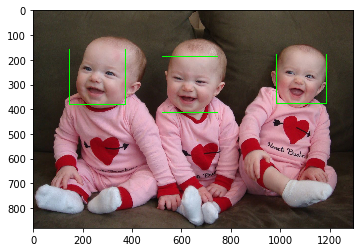

In [67]:
test2 = cv2.imread('data/test3.jpg')

faces_detected_img = detect_faces(lbp_face_cascade, test2)

plt.imshow(convertToRGB(faces_detected_img))

# HAAR VS LBP 결과분석

## 각각의 정확도와 시간지연을 확인

In [68]:
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

test1 = cv2.imread('data/test5.jpg')
test2 = cv2.imread('data/test6.jpg')

### test1

In [72]:
t1 = time.time()

haar_detected_img = detect_faces(haar_face_cascade, test1)

t2 = time.time()

dt1 = t2 - t1
print(dt1)

0.5915811061859131


In [73]:
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

t2 = time.time()

dt2 = t2-t1
print(dt2)

0.23914670944213867


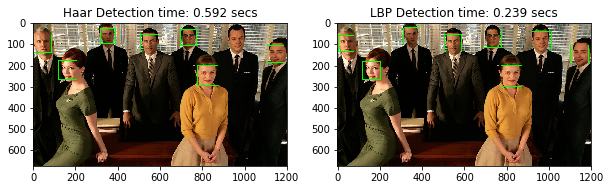

In [75]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

### test2

the time difference


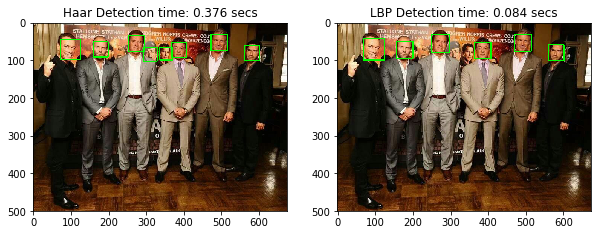

In [79]:
t1 = time.time()  
 
#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, test2)  
 
#note time after detection
t2 = time.time() 
#calculate time difference 
dt1 = t2 - t1 #
print ("the time difference")
 
#------------LBP----------- 
#note time before detection
t1 = time.time() 
 
#call our function to detect faces
lbp_detected_img = detect_faces(lbp_face_cascade, test2)  
 
#note time after detection 
t2 = time.time() 
#calculate time difference 
dt2 = t2 - t1 
#print the time difference  
 
#----------Let's do some fancy drawing------------- 
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
 
 #show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs') 
ax1.imshow(convertToRGB(haar_detected_img))  
 
#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs') 
ax2.imshow(convertToRGB(lbp_detected_img))  
 
#show images 
# plt.imshow(faces_detected_img)

# Technical end Notes

속도 : LBP > Haar
정확도 : Haar > LBP